In [69]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import h5py

FIGSIZE = (5, 5)
plt.rcParams['figure.figsize'] = FIGSIZE
plt.rcParams['figure.dpi'] = 300
# set tight layout for all plots
plt.rcParams['figure.autolayout'] = True
SAVEFIG = True

# Settings 

The attenuator is at $36 dB$.

In [ ]:
def load_waveforms(filename, channel):
    with h5py.File(filename, 'r') as f:
        waveforms = f[f'CH{channel}']
        waveforms = [waveforms[str(i)] for i, _ in enumerate(waveforms)]
        waveforms = [pd.DataFrame(w, columns=['t', 'V']) for w in waveforms]
        return waveforms
def construct_filepath(pmt_number):
    FILEPATH = rf'data/single_photon_res/pmt{pmt_number}/signals.h5'
    return FILEPATH


/tmp/ipykernel_9498/2317689365.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(np.round(a.get_xticks() * 1e9))
/tmp/ipykernel_9498/2317689365.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_yticklabels(np.round(a.get_yticks() * 1e3))
/tmp/ipykernel_9498/2317689365.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(np.round(a.get_xticks() * 1e9))
/tmp/ipykernel_9498/2317689365.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_yticklabels(np.round(a.get_yticks() * 1e3))


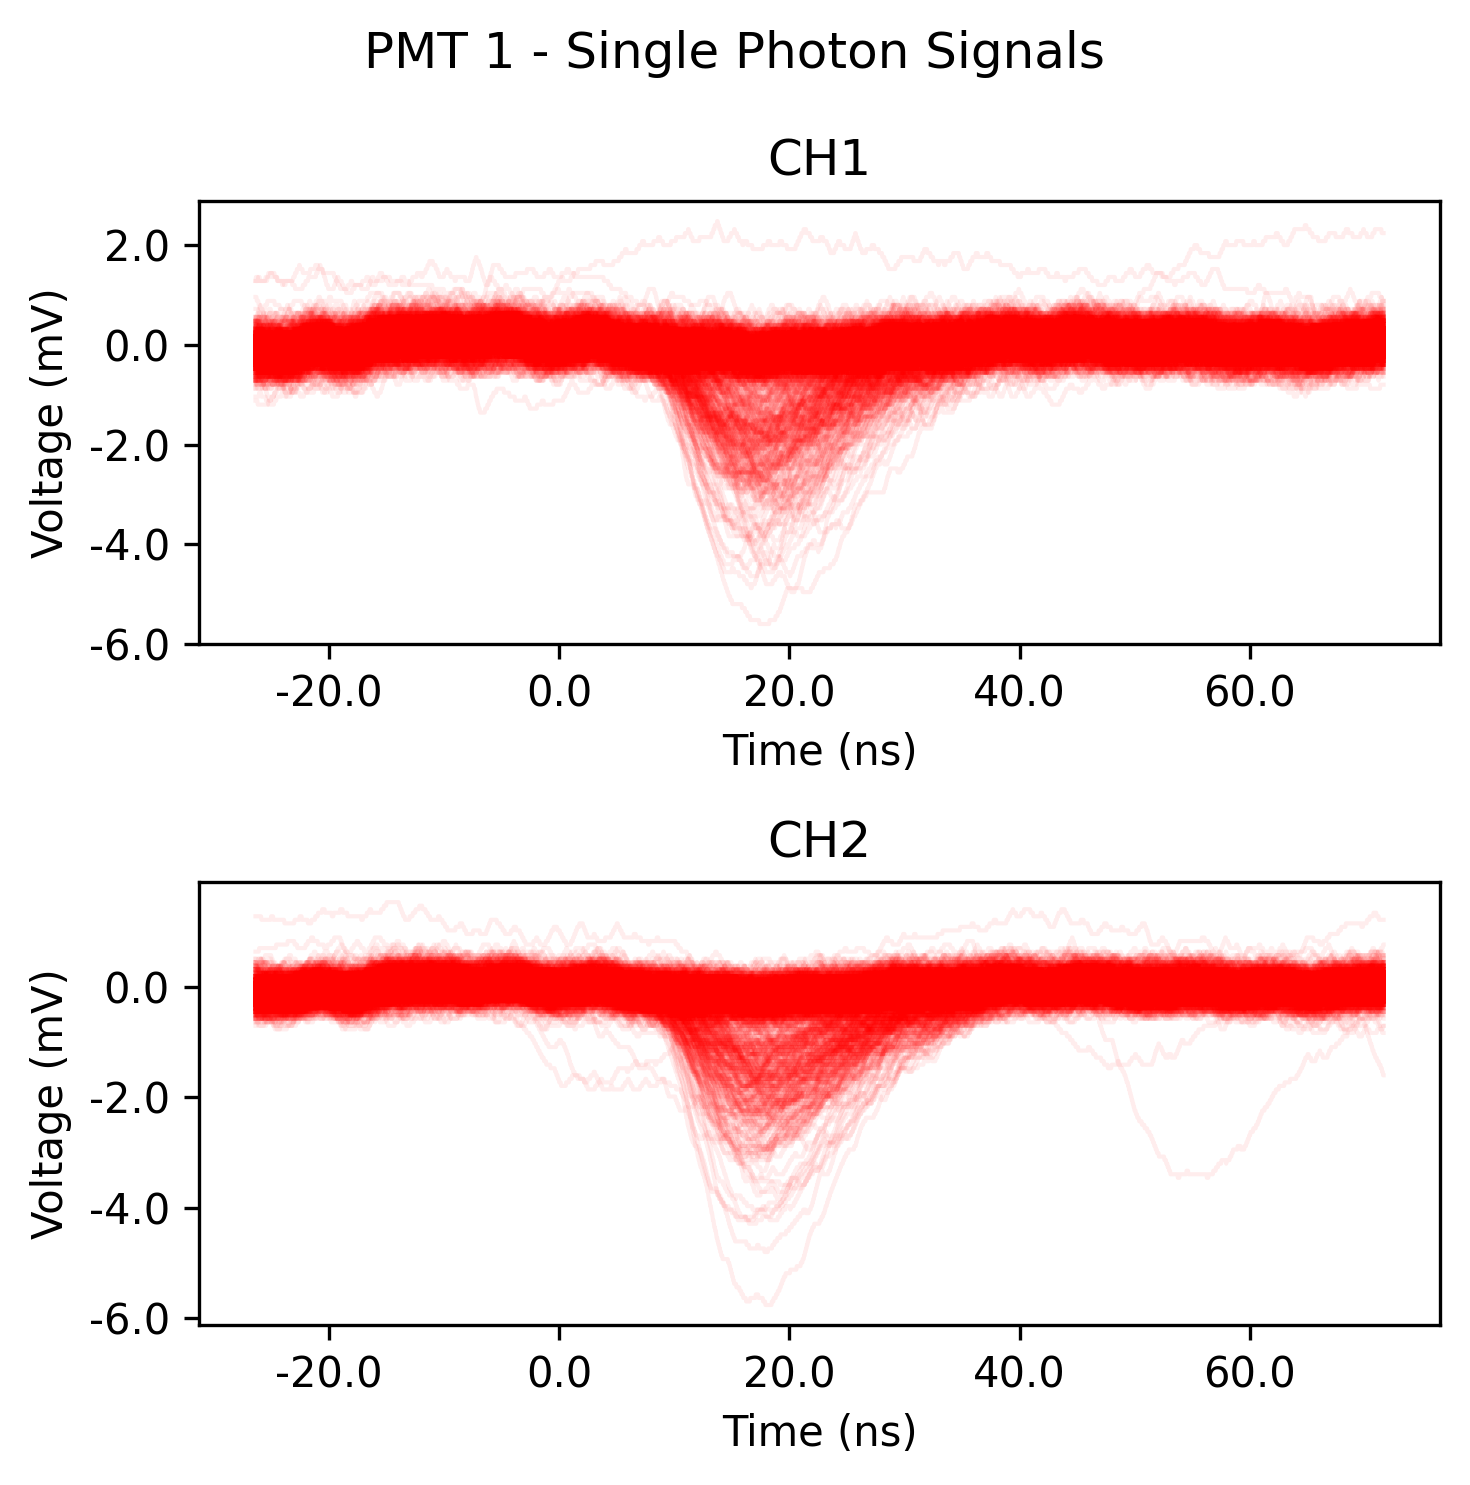

/tmp/ipykernel_9498/2317689365.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(np.round(a.get_xticks() * 1e9))
/tmp/ipykernel_9498/2317689365.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_yticklabels(np.round(a.get_yticks() * 1e3))
/tmp/ipykernel_9498/2317689365.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(np.round(a.get_xticks() * 1e9))
/tmp/ipykernel_9498/2317689365.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_yticklabels(np.round(a.get_yticks() * 1e3))


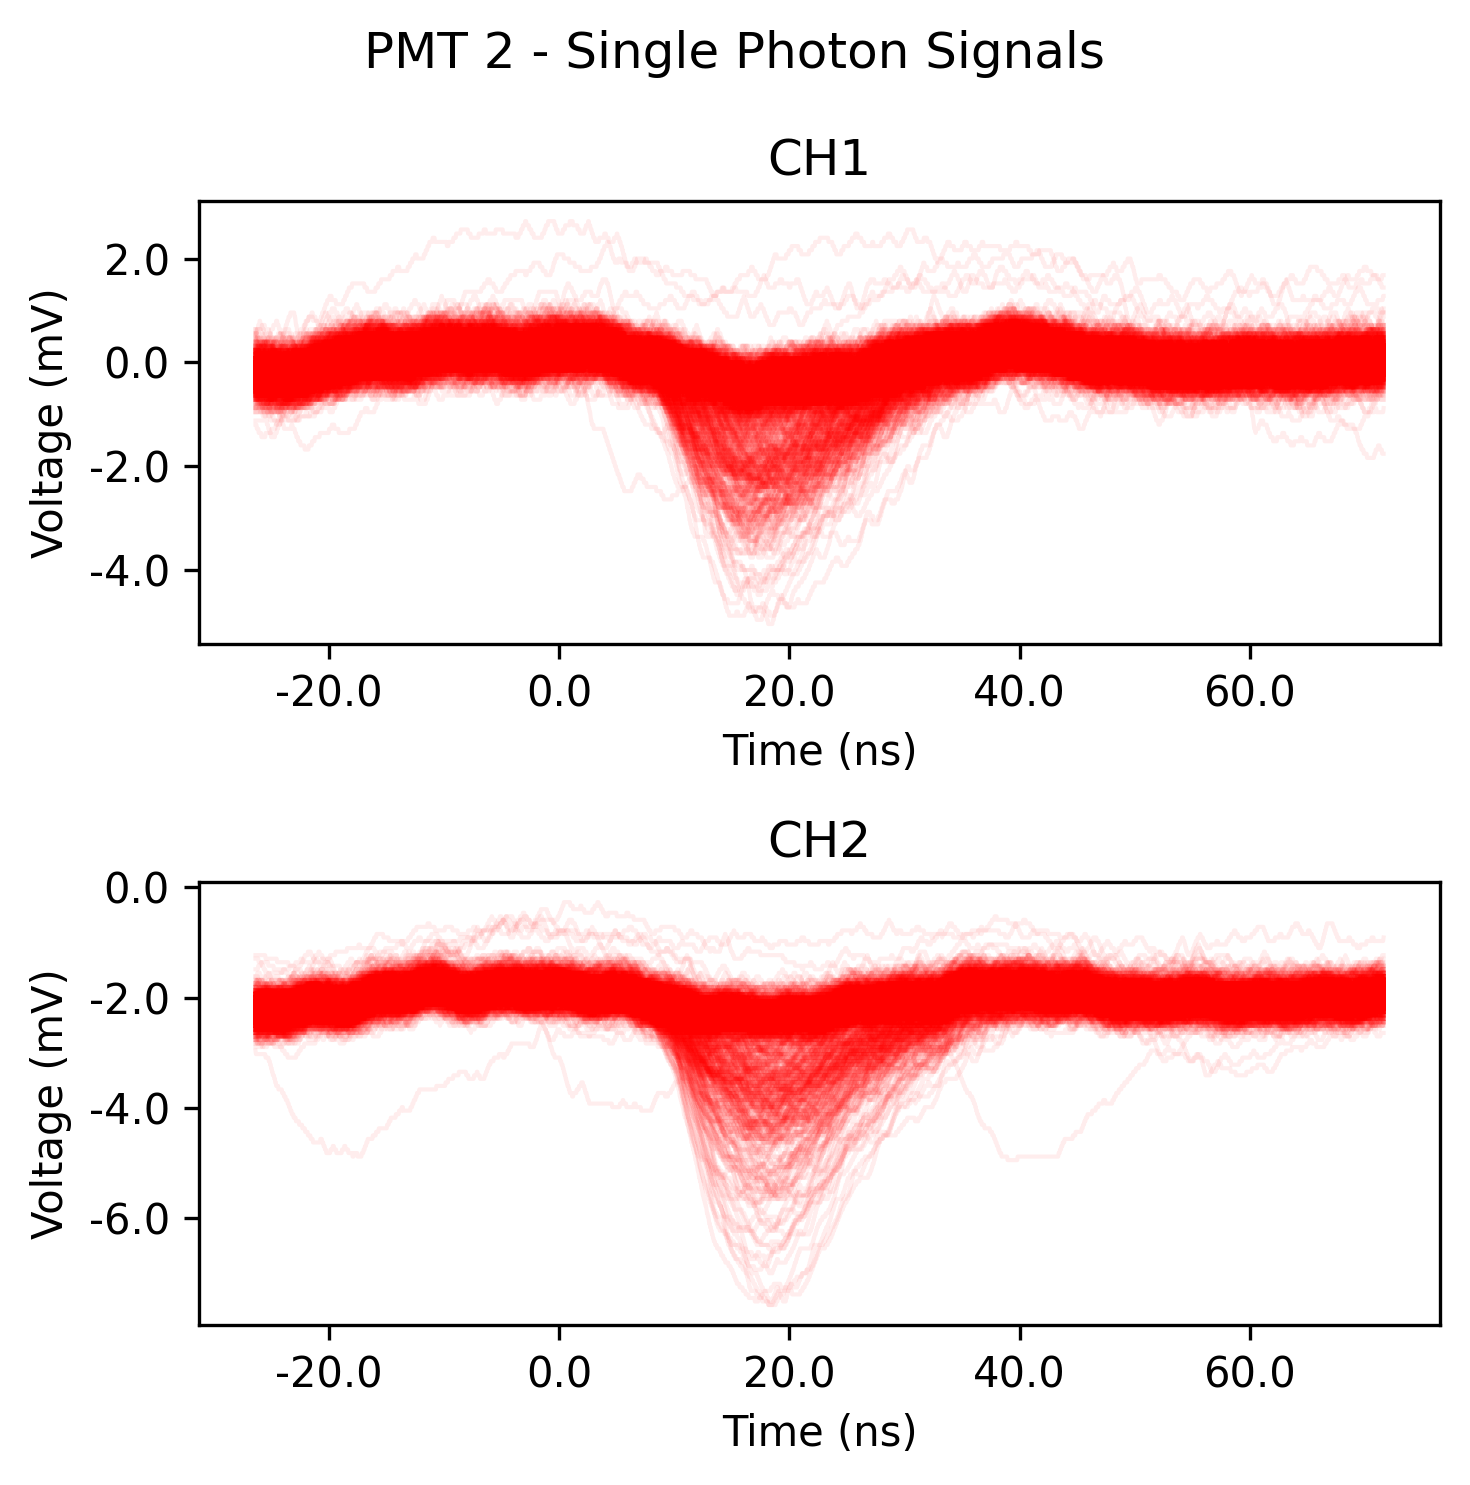

In [71]:
def plot_waveforms(pmt_number):
    filepath=construct_filepath(pmt_number)
    wavs_ch1 = load_waveforms(filepath, 1)
    wavs_ch2 = load_waveforms(filepath, 2)
    fig, ax = plt.subplots(2,1,figsize=FIGSIZE)
    fig.suptitle(f'PMT {pmt_number} - Single Photon Signals')
    ax[0].set_title('CH1')
    ALPHA=0.07
    for w in wavs_ch1:
        if w['V'].max() ==0 and w['V'].min() == 0:
            continue
        ax[0].plot(w['t'], w['V'], color = 'red', alpha = ALPHA, linewidth = 1.)
    ax[1].set_title('CH2')
    for w in wavs_ch2:
        if w['V'].max() ==0 and w['V'].min() == 0:
            continue
        ax[1].plot(w['t'], w['V'], color = 'red', alpha = ALPHA, linewidth = 1.)

    # multiply x ticks by 1000 to rescale to ns

    for a in ax:
        a.set_xticklabels(np.round(a.get_xticks() * 1e9))
        a.set_xlabel('Time (ns)')
        a.set_yticklabels(np.round(a.get_yticks() * 1e3))
        a.set_ylabel('Voltage (mV)')
    plt.tight_layout()
    plt.savefig(f'plots/single_photon_res/pmt{pmt_number}/single_photon_signals.png', dpi=300)
    plt.show()
plot_waveforms(1)
plot_waveforms(2)

/tmp/ipykernel_9498/2782424901.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(np.round(a.get_xticks() * 1e3))
/tmp/ipykernel_9498/2782424901.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(np.round(a.get_xticks() * 1e3))


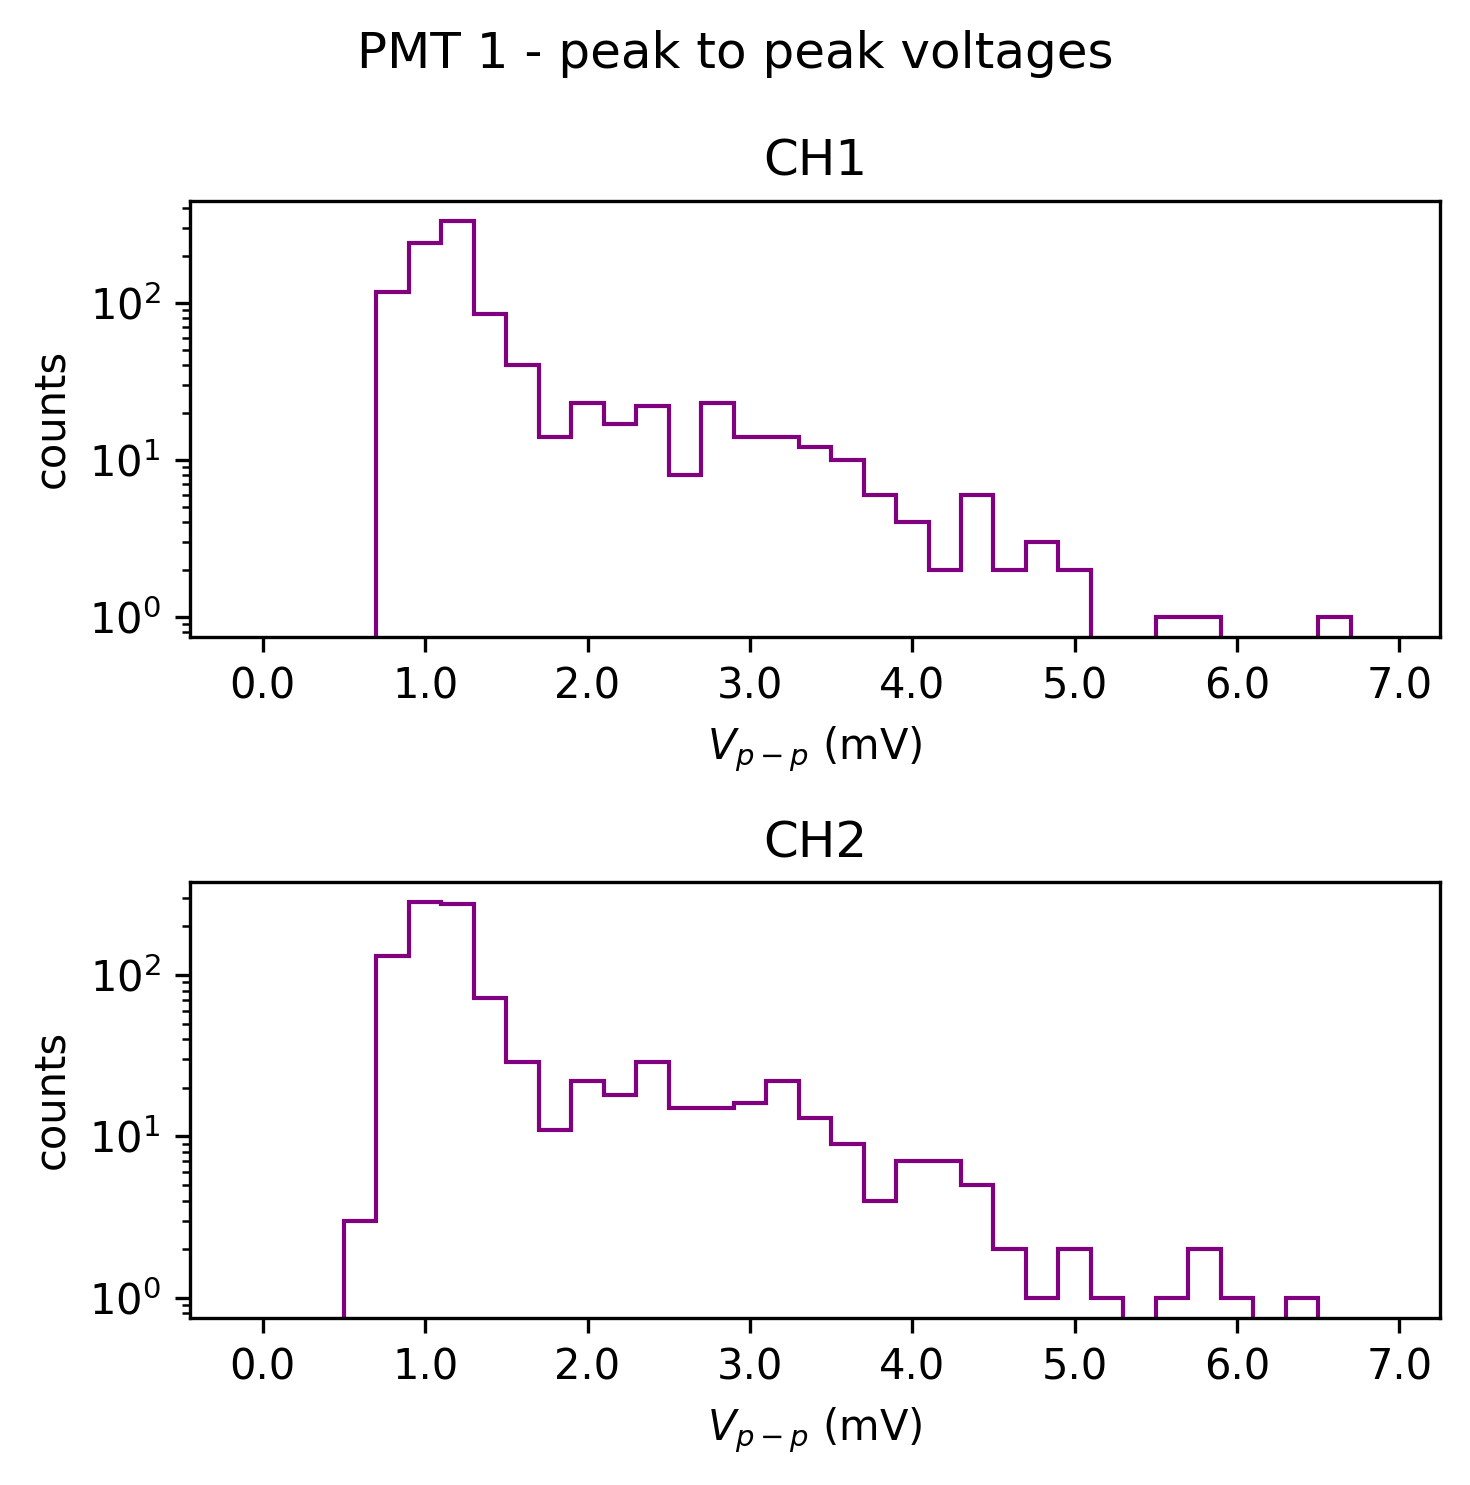

/tmp/ipykernel_9498/2782424901.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(np.round(a.get_xticks() * 1e3))
/tmp/ipykernel_9498/2782424901.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(np.round(a.get_xticks() * 1e3))


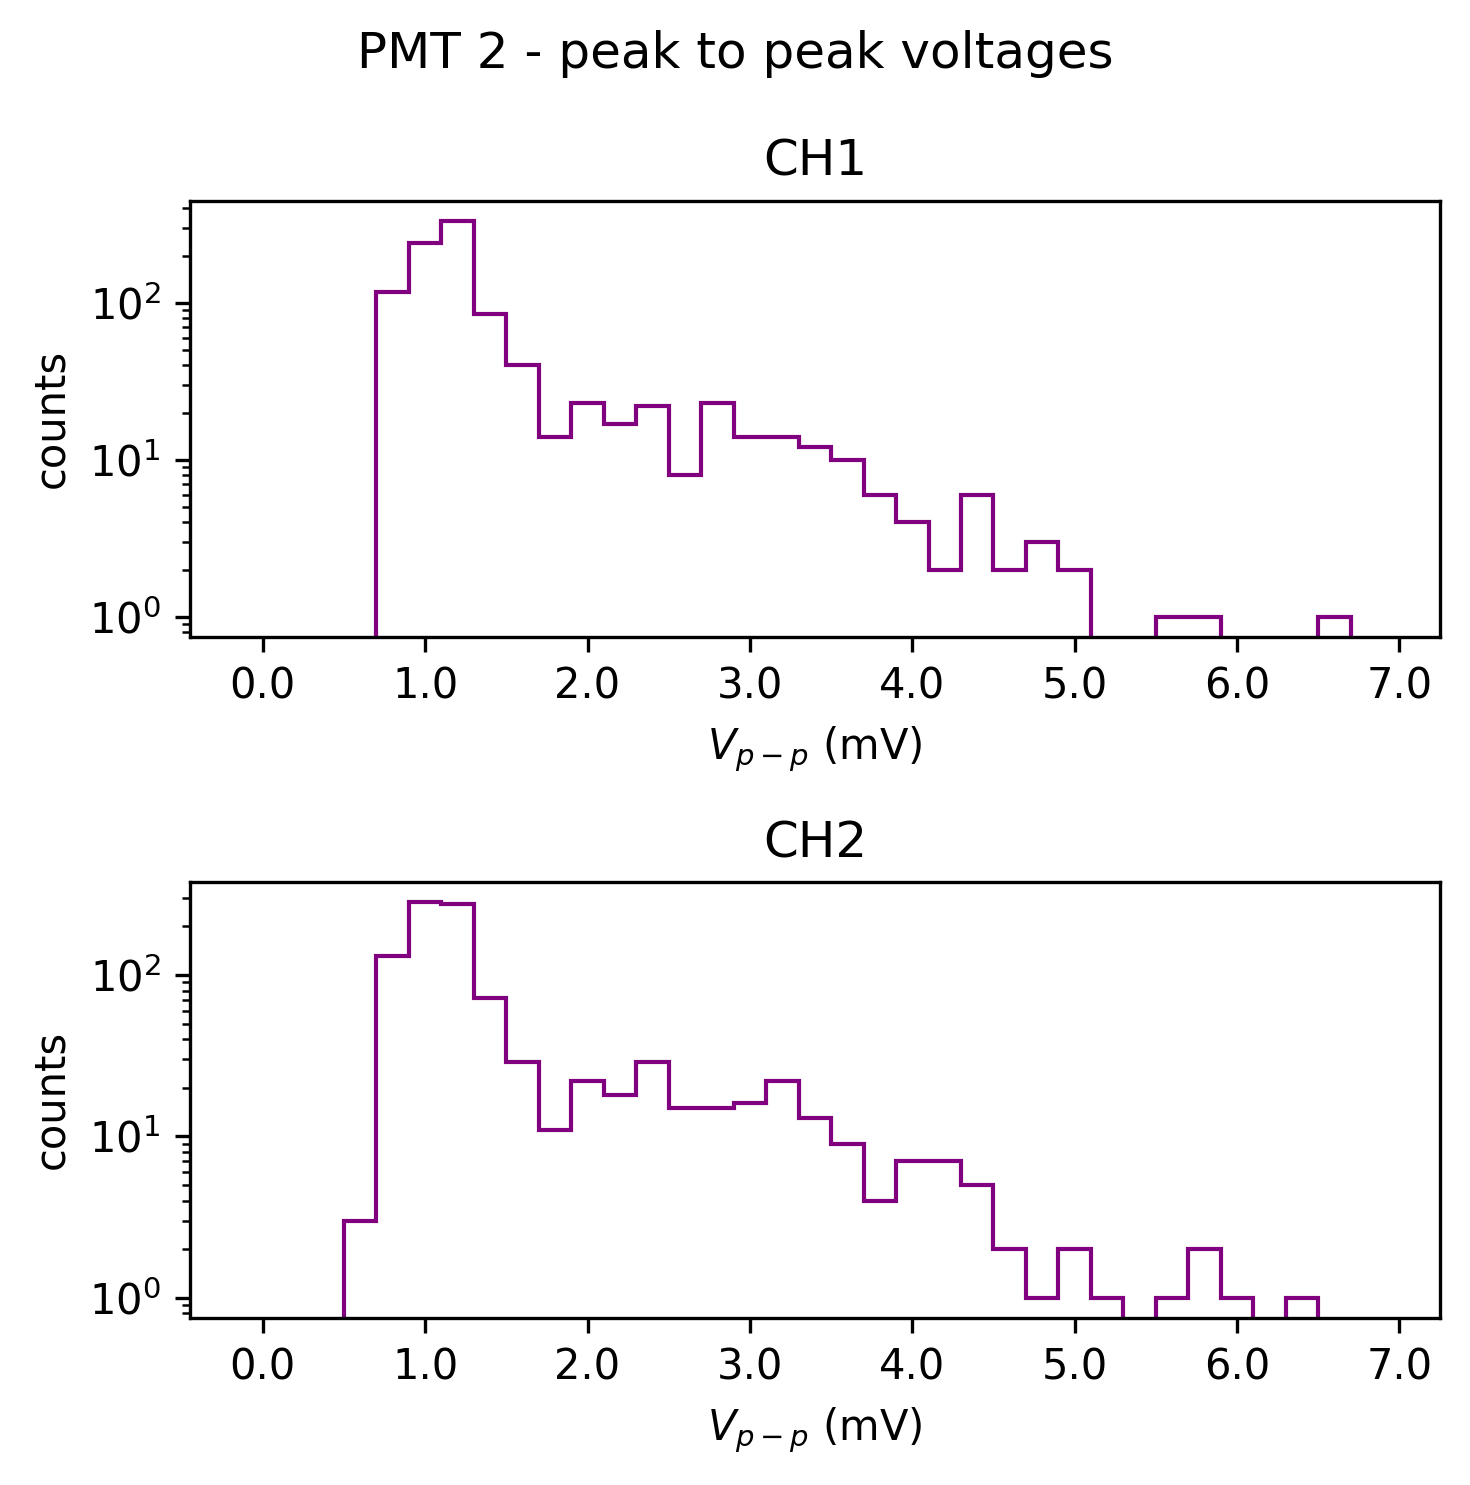

In [72]:

def hist_p2p(pmt_number):
    filepath=construct_filepath(1)
    wavs_ch1 = load_waveforms(filepath, 1)
    wavs_ch2 = load_waveforms(filepath, 2)

    fig, ax = plt.subplots(2,1,figsize = FIGSIZE)
    fig.suptitle(f'PMT {pmt_number} - peak to peak voltages')

    min = 0e-3
    max = 7e-3
    step = 2e-4
    bins = np.arange(min - step/2, max+step/2, step)
    COLOR= 'purple'
    
    vp2ps = [w['V'].max() - w['V'].min() for w in wavs_ch1]
    ax[0].hist(vp2ps, range=(min, max), bins=bins, histtype='step', color=COLOR)
    ax[0].set_title('CH1')

    vp2ps = [w['V'].max() - w['V'].min() for w in wavs_ch2]
    ax[1].hist(vp2ps, range=(min, max), bins=bins, histtype='step', color=COLOR)
    ax[1].set_title('CH2')
    
    for a in ax:
        a.set_xticklabels(np.round(a.get_xticks() * 1e3))
        a.set_xlabel(r'$V_{p-p}$ (mV)')
        a.set_ylabel('counts')
        a.set_yscale('log')

    if SAVEFIG:
        plt.savefig(f'plots/single_photon_res/pmt{pmt_number}/p2p_hist.png', dpi=300)
    plt.show()
hist_p2p(1)
hist_p2p(2)

/tmp/ipykernel_9498/1153743311.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(np.round(a.get_xticks() * 1e3))
/tmp/ipykernel_9498/1153743311.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(np.round(a.get_xticks() * 1e3))


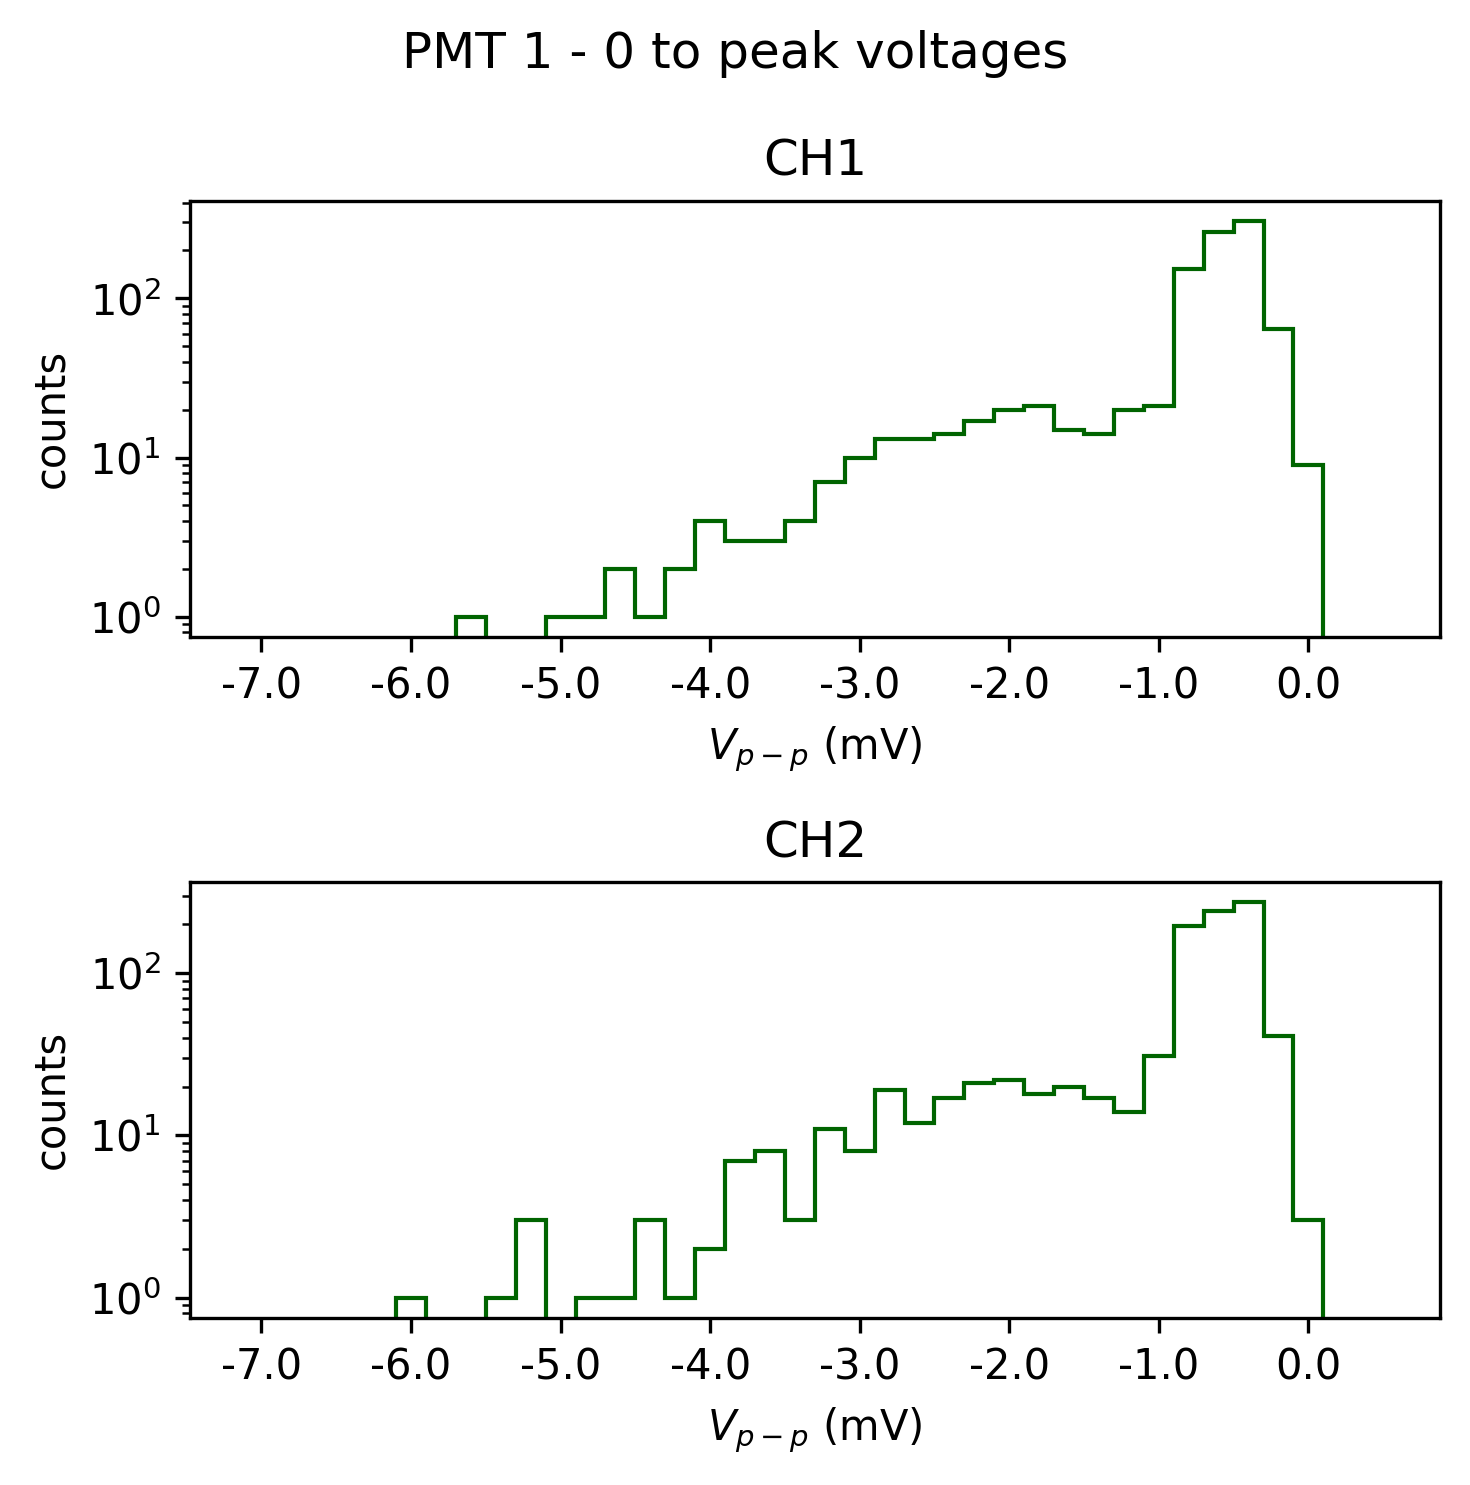

/tmp/ipykernel_9498/1153743311.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(np.round(a.get_xticks() * 1e3))
/tmp/ipykernel_9498/1153743311.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(np.round(a.get_xticks() * 1e3))


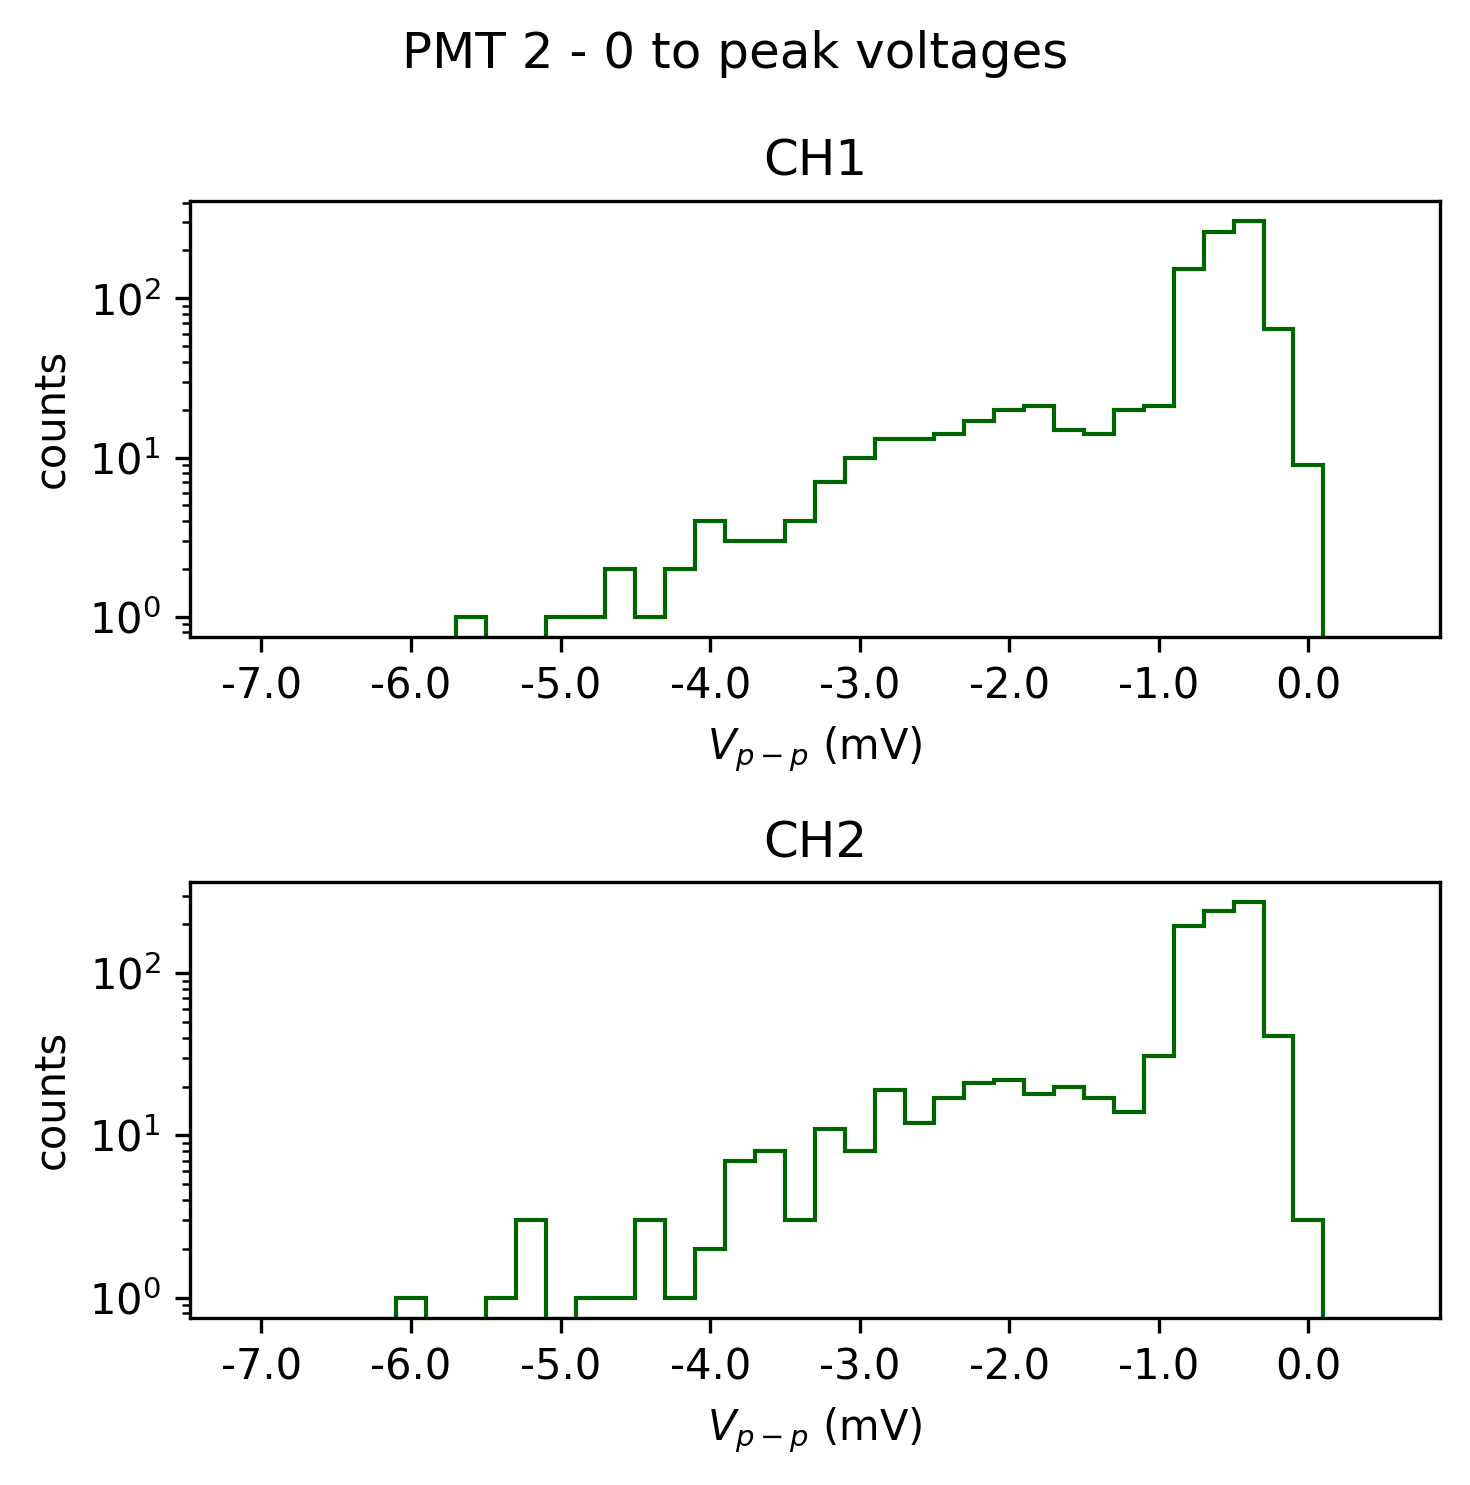

In [73]:
def hist_02p(pmt_number):
    filepath=construct_filepath(1)
    wavs_ch1 = load_waveforms(filepath, 1)
    wavs_ch2 = load_waveforms(filepath, 2)

    vmins = np.array([w['V'].min() for w in wavs_ch1])
    vmins *=-1

    fig, ax = plt.subplots(2,1,figsize = FIGSIZE)
    fig.suptitle(f'PMT {pmt_number} - 0 to peak voltages')

    vmins = np.array([w['V'].min() for w in wavs_ch1])

    min = -7e-3
    max = 0.5e-3
    step = 2e-4
    bins = np.arange(min - step/2, max+step/2, step)
    COLOR= 'darkgreen'

    ax[0].hist(vmins, range=(min, max), bins=bins, histtype='step', color=COLOR)
    ax[0].set_title('CH1')
    ax[0].set_xlabel(r'$V_{0-p}$ (V)')
    ax[0].set_yscale('log')

    vmins = np.array([w['V'].min() for w in wavs_ch2])
    ax[1].hist(vmins, range=(min, max), bins=bins, histtype='step', color=COLOR)
    ax[1].set_title('CH2')
    ax[1].set_xlabel(r'$V_{0-p}$ (V)')
    ax[1].set_yscale('log')
    
    for a in ax:
        a.set_xticklabels(np.round(a.get_xticks() * 1e3))
        a.set_xlabel(r'$V_{p-p}$ (mV)')
        a.set_ylabel('counts')
        a.set_yscale('log')
    
    if SAVEFIG:
        plt.savefig(f'plots/single_photon_res/pmt{pmt_number}/0p_hist.png', dpi=300)
    plt.show()

hist_02p(1)
hist_02p(2)

/tmp/ipykernel_9498/3090405200.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(V, t)


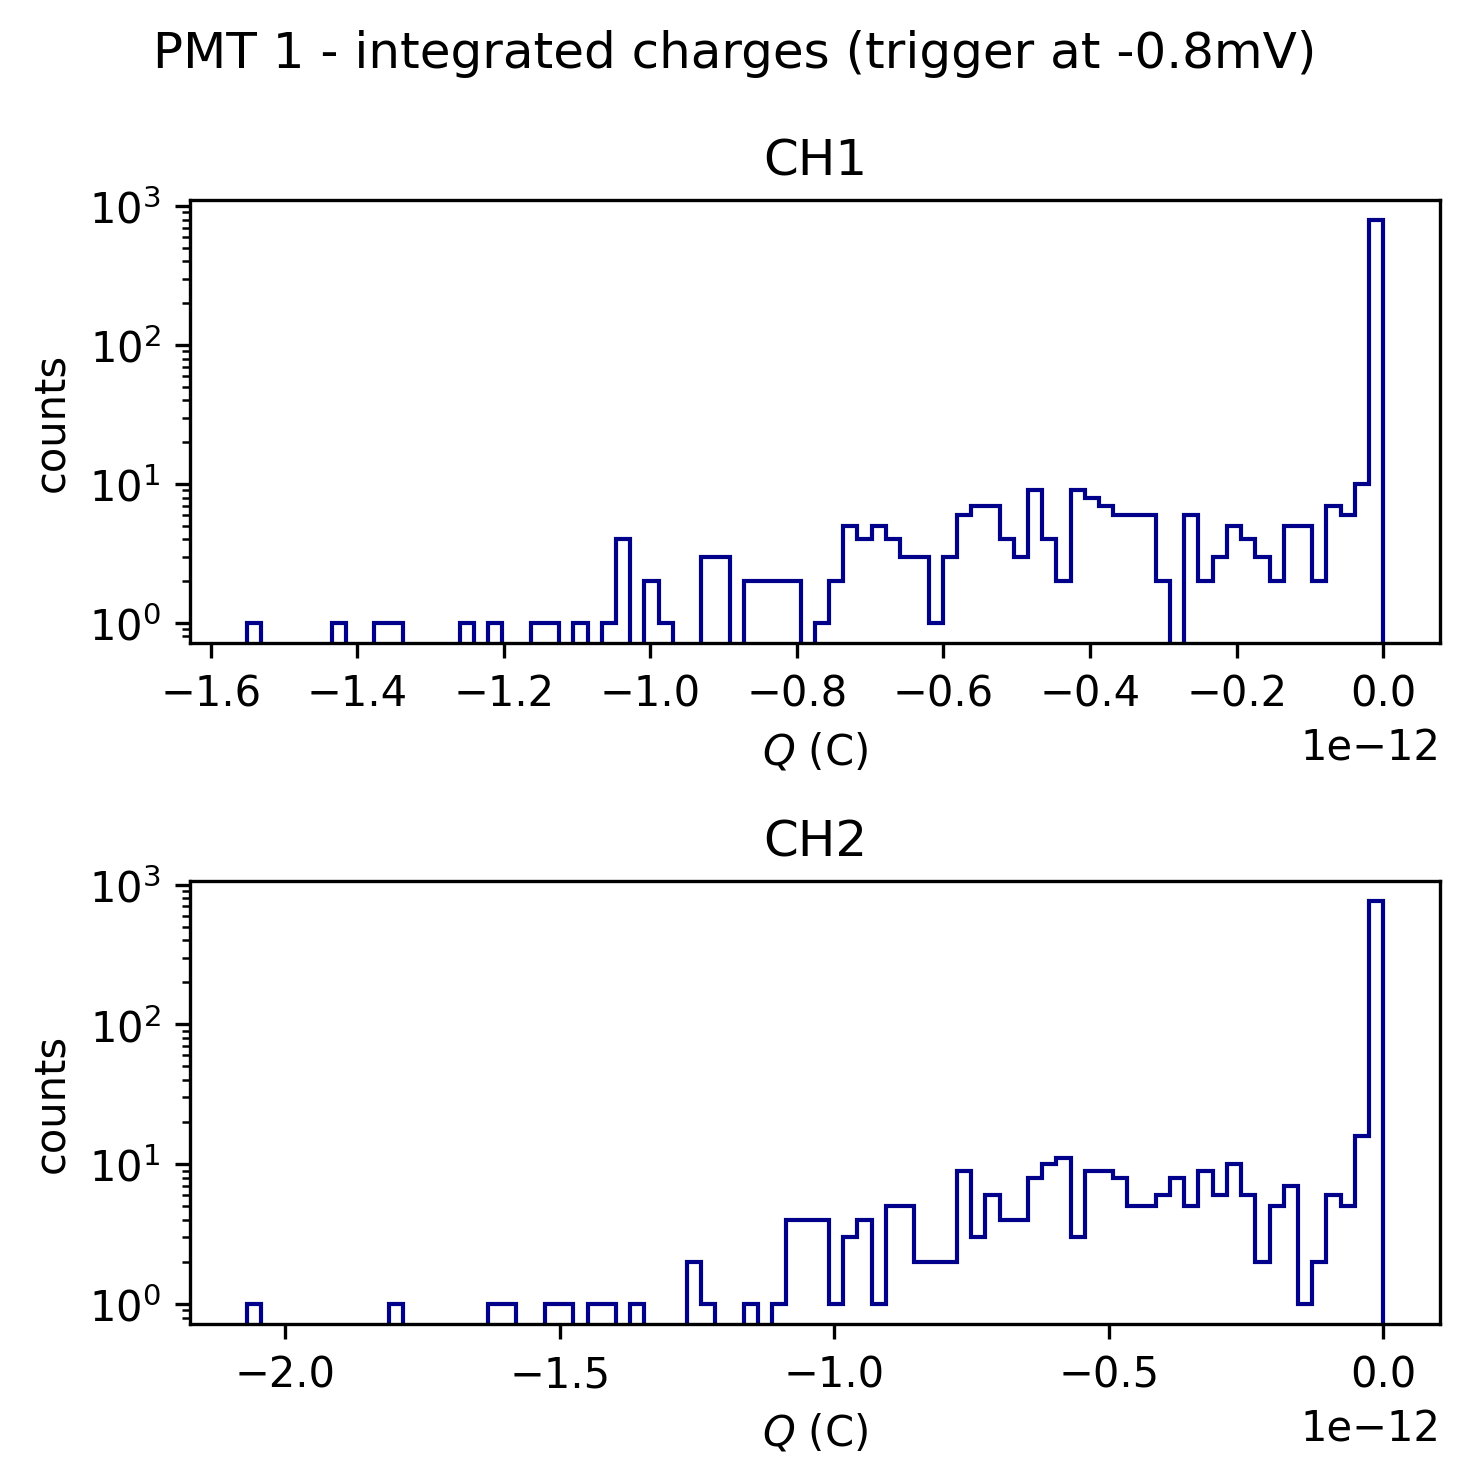

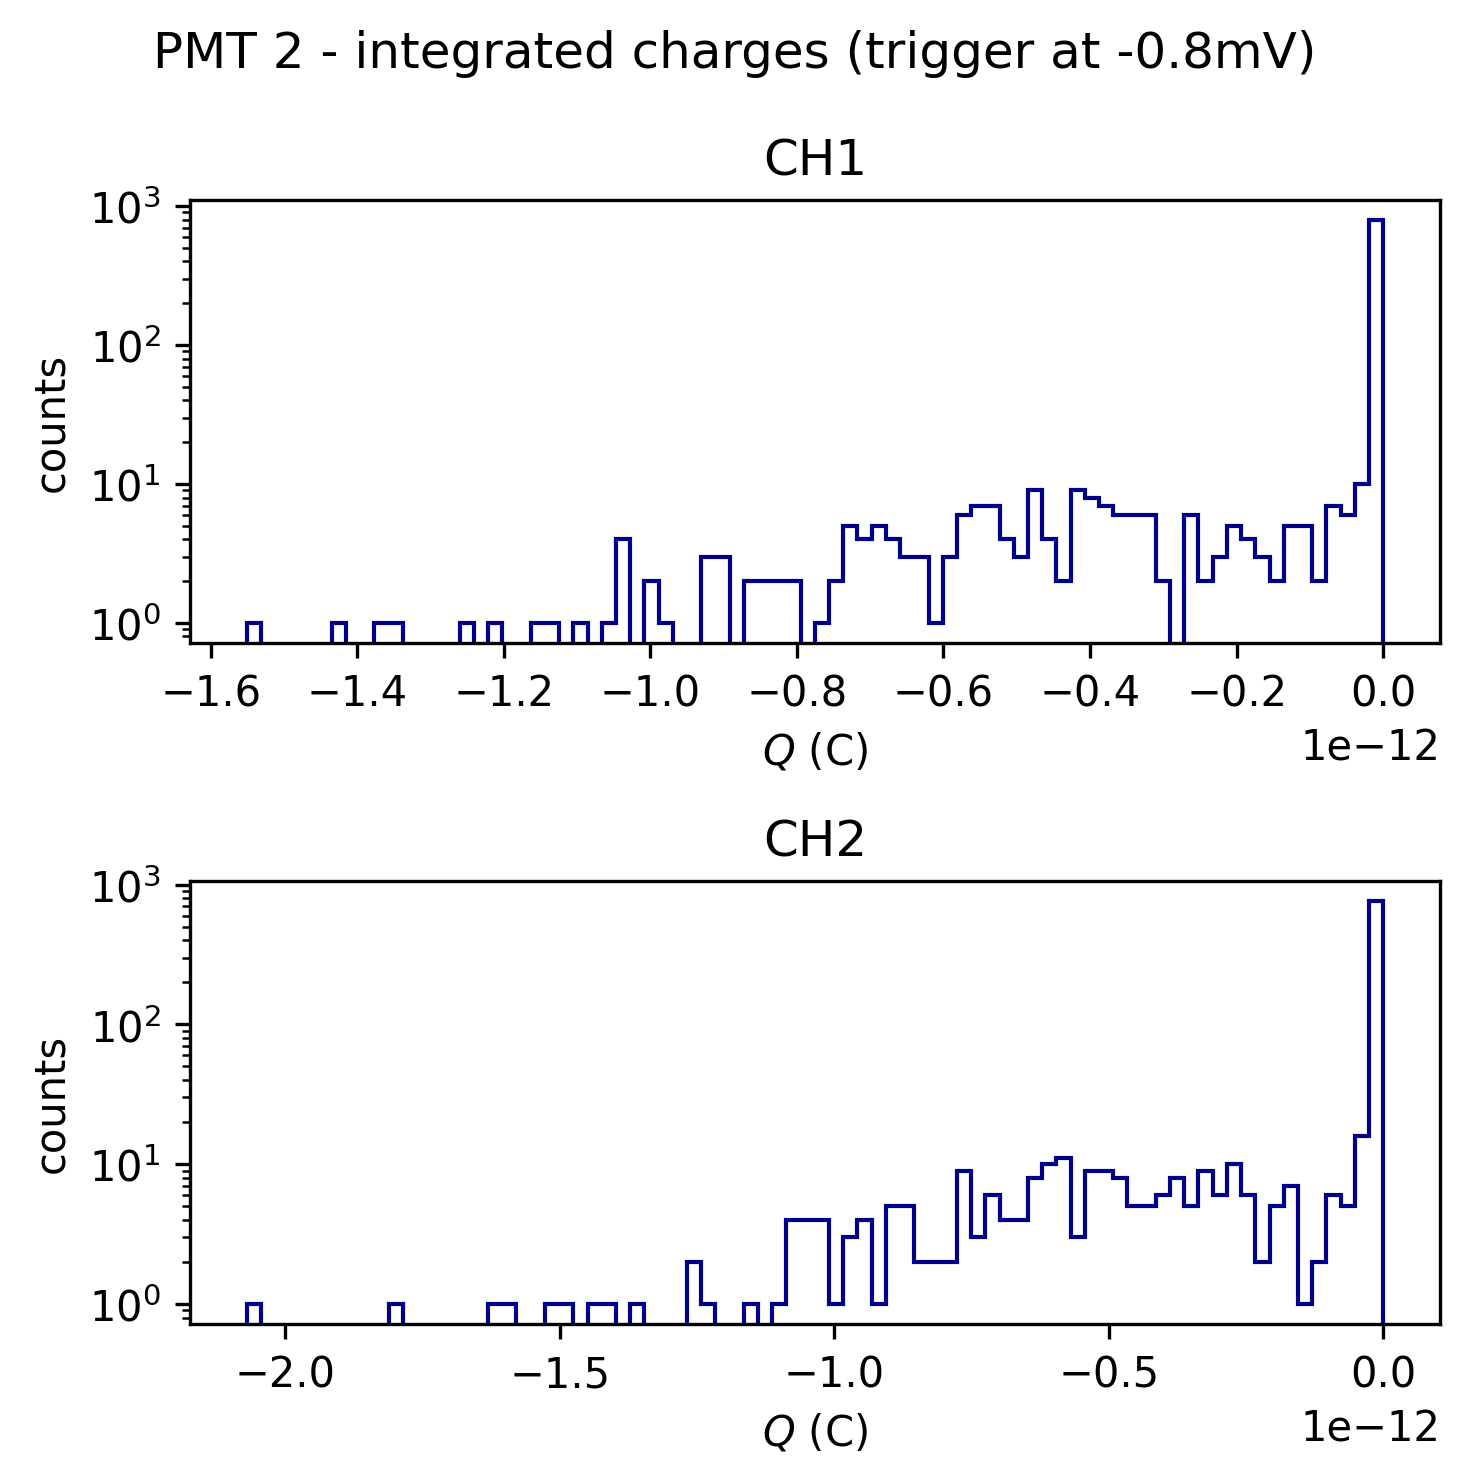

In [74]:

def integrate(V_s, t_s, R = 50, trigger=-0.8e-3):
    V = np.array(V_s)
    V = [v if v < trigger else 0 for v in V]
    t = np.array(t_s)
    integral = np.trapz(V, t)
    return integral/R

def hist_integral(pmt_number):
    filepath=construct_filepath(1)
    wavs_ch1 = load_waveforms(filepath, 1)
    wavs_ch2 = load_waveforms(filepath, 2)

    fig, ax = plt.subplots(2,1,figsize = FIGSIZE)
    fig.suptitle(f'PMT {pmt_number} - integrated charges (trigger at -0.8mV)')
    nbins=80
    COLOR= 'darkblue'

    integrals = [integrate(w['V'], w['t']) for w in wavs_ch1]
    ax[0].hist(integrals, bins=nbins, histtype='step', color=COLOR)
    ax[0].set_title('CH1')

    integrals = [integrate(w['V'], w['t']) for w in wavs_ch2]
    ax[1].hist(integrals, bins=nbins, histtype='step', color=COLOR)
    ax[1].set_title('CH2')
    
    for a in ax:
        a.set_xlabel(r'$Q$ (C)')
        a.set_ylabel('counts')
        a.set_yscale('log')

    if SAVEFIG:
        plt.savefig(f'plots/single_photon_res/pmt{pmt_number}/integral_hist.png', dpi=300)
    plt.show()

hist_integral(1)
hist_integral(2)